In [1]:
#external packages
import numpy as np
import math
from astropy import units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
from matplotlib.backends.backend_pdf import PdfPages
import sys
import random
%load_ext autoreload

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.append('/home/almhatre/data')

In [2]:
import AGNclustering.kNN_functions as k
from AGNclustering.KNN_stuff import CDFkNN_rp_pi
from AGNclustering.kNN_error import kNN_ratio_error, block_test, kNN_chi_squared,kNN_diff_error,chop_cdf
from AGNclustering.utils import z_to_cdist
from AGNclustering.wppi_utils import control_mult_var,control_var

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
data_directory = '/home/almhatre/data/BASS/'
cat = Table.read(data_directory + 'data_dr2.csv',format='csv')
agnt =np.array(cat)
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
t = Table.read(data_directory +'2mrs_noAGN.csv',format='csv')
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN
agn.dtype.names

('col0',
 'bat_index',
 'Counterpart',
 'Type',
 'z',
 'Mbh',
 'Method',
 'Edd_rat',
 'L_edd',
 'L_bol',
 'NH',
 'L210',
 'ra',
 'dec',
 'L14195',
 'AGN',
 'flux',
 'Snu_1',
 'Snu_6',
 'Morphology',
 'log_Ms',
 'Lir_sf')

In [232]:
nonzero=(agn["Mbh"]>0)
agnmass=agn[nonzero]
zbins=np.arange(0.01,.11,.01)

stmin=np.min(agnmass['log_Ms'][agnmass['log_Ms']>8])
stmax=np.max(agnmass['log_Ms'][agnmass['log_Ms']>8])
increm=(stmax-stmin)/5
msbins=np.arange(stmin,stmax+increm,increm)

increm=(stmax-stmin)/9
msbinsmod=np.arange(stmin,stmax+increm,increm)


stmin=np.min(agnmass['Mbh'][agnmass['Mbh']>0])
stmax=np.max(agnmass['Mbh'][agnmass['Mbh']>0])
increm=(stmax-stmin)/9
massbins=np.arange(stmin,stmax+increm,increm)


percentile=33


In [233]:
%autoreload 2

lower, mid, upper = control_mult_var(agn=agnmass,bins1=zbins,bins2=massbins,control1='z',control2='Mbh',var='L210',percentile=50)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)


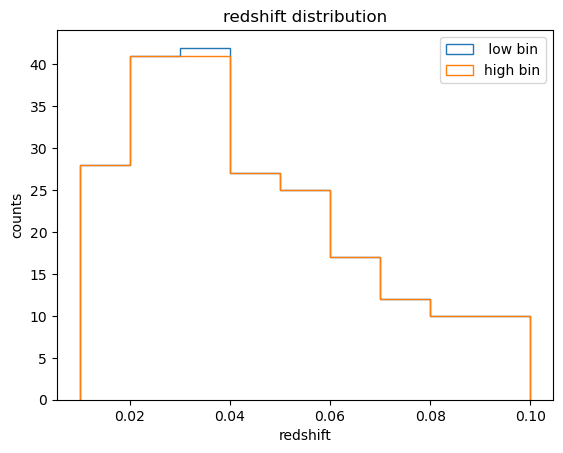

In [159]:
plt.hist(l['z'],bins=zbins,histtype='step',label=' low bin')
plt.hist(up['z'],bins=zbins,histtype='step',label='high bin')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.title('redshift distribution')
plt.legend()


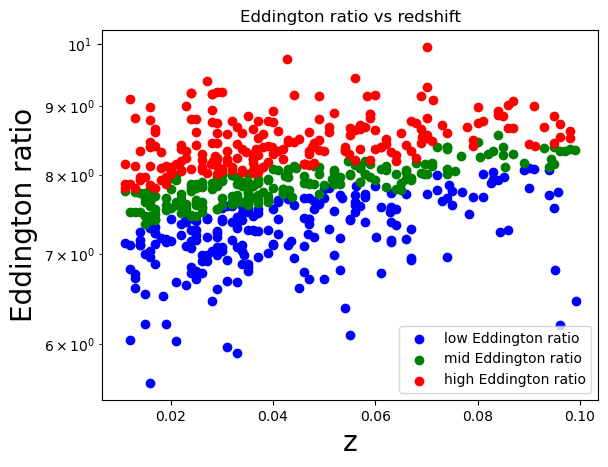

In [235]:
plt.scatter(l['z'],l['Mbh'],label='low Eddington ratio',color='blue')
plt.scatter(m['z'],m['Mbh'],label="mid Eddington ratio",color='green')
plt.scatter(up['z'],up['Mbh'],label='high Eddington ratio',color='red')
plt.xlabel('z',fontsize=20)
plt.ylabel('Eddington ratio',fontsize=20)
plt.title('Eddington ratio vs redshift')
plt.legend()
plt.yscale('log')
# output2,err2,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=2,rpbool=True)
# output3,err3,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=3,rpbool=True)
# output4,err4,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=4,rpbool=True)
# output5,err5,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=5,rpbool=True)
# output6,err6,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=6,rpbool=True)
# output7,err7,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=7,rpbool=True)
# output8,err8,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=8,rpbool=True)
# output9,err9,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=9,rpbool=True)
# output10,err10,cov = k.kNN_wrapper(rsmod,pismod, agn, gal,kneighbors=3,m=10,rpbool=True)

In [165]:

# rs=np.logspace(-1,np.log10(41),11)
# rs=np.insert(rs,-1,40.0)
# pis=np.logspace(-1,np.log10(41),11)
# pis=np.insert(pis,-1,40.0)
# rsmod= np.logspace(-1,np.log10(40),11)
# pismod = np.logspace(-1,np.log10(40),11)


rs=np.logspace(0,np.log10(41),5)
rs=np.insert(rs,-1,40.0)
pis=np.logspace(0,np.log10(41),5)
pis=np.insert(pis,-1,40.0)
rsmod= np.logspace(0,np.log10(40),5)
pismod = np.logspace(0,np.log10(40),5)


# rs= np.arange(0,65,2,dtype=float)
# rs[0]=0.1
# pis = np.arange(0,65,2,dtype=float)
# pis[0]=0.1
# rsmod= np.arange(0,65,2,dtype=float)
# rsmod[0]=0.1
# pismod = np.arange(0,65,2,dtype=float)
# pismod[0]=0.1
# rsmod=np.delete(rsmod,-1)
# pismod=np.delete(pismod,-1)

print(rs)
print(rsmod)
t1=time.time()
# output150,err50,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=5,m=50,rpbool=True)
# output,err,cov = k.kNN_wrapper(rs,pis,agn,gal,kneighbors=3,m=5,rpbool=True)
t = time.time() - t1
# print('took ',str(t/60),' minutes')

[ 1.          2.53043953  6.40312424 16.20271871 40.         41.        ]
[ 1.          2.51486686  6.32455532 15.90541458 40.        ]


In [166]:
# errors=np.empty(0)
# errors =np.append(errors,(err2[2][-2]))
# errors = np.append(errors,(err3[2][-2]))
# errors = np.append(errors,(err4[2][-2]))
# errors = np.append(errors,(err5[2][-2]))
# errors = np.append(errors,(err6[2][-2]))
# errors = np.append(errors,(err7[2][-2]))
# errors = np.append(errors,(err8[2][-2]))
# errors = np.append(errors,(err9[2][-2]))
# errors = np.append(errors,(err10[2][-2]))
# # errors = np.append(errors, (err50[2][2]))
# # print(rs[-2])
# # # plt.ylim(0,0.003)

# print(ms[0:-1])

# plt.scatter(ms[0:-1],errors)
# plt.title('Error vs m: k=3,large bin')

In [248]:
t1=time.time()
outputlow,errlow,covlow = k.kNN_wrapper(rs,pis, l, gal,kneighbors=6,m=5,concatenate=True,rpbool=True)
t = time.time() - t1
print('took ',str(t/60),' minutes')

using LCDM cosmology: Om0=.3, H0=70
Ngal 213 Nrand 38567 6
build tree 0.0004956722259521484
query 0.008769989013671875
  kdtree tot 0.009307146072387695
cdf parallel 0.014770746231079102
  cdf 0.01514577865600586
Using  25  jacknife samples
1 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 210 Nrand 37881 6
build tree 0.0002789497375488281
query 0.008686542510986328
  kdtree tot 0.009003877639770508
cdf parallel 0.014433145523071289
  cdf 0.014811992645263672
2 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 200 Nrand 36919 6
build tree 0.0002646446228027344
query 0.008778810501098633
  kdtree tot 0.009083271026611328
cdf parallel 0.013797283172607422
  cdf 0.014175891876220703
3 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 197 Nrand 35105 6
build tree 0.00037741661071777344
query 0.007732868194580078
  kdtree tot 0.008152961730957031
cdf parallel 0.012941837310791016
  cdf 0.01332545280456543
4 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 201 Nrand 35700 6
build tree 0.00048565864562988

In [249]:
outputhigh, errhigh, covhigh = k.kNN_wrapper(rs,pis, up, gal, kneighbors=6, m=5,concatenate=True,rpbool=True)

using LCDM cosmology: Om0=.3, H0=70
Ngal 212 Nrand 38567 6
build tree 0.000316619873046875
query 0.009076595306396484
  kdtree tot 0.009433984756469727
cdf parallel 0.014185667037963867
  cdf 0.014552593231201172
Using  25  jacknife samples
1 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 209 Nrand 37881 6
build tree 0.00043964385986328125
query 0.00895380973815918
  kdtree tot 0.00943446159362793
cdf parallel 0.013140678405761719
  cdf 0.013534784317016602
2 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 194 Nrand 36919 6
build tree 0.0002987384796142578
query 0.008272886276245117
  kdtree tot 0.008623361587524414
cdf parallel 0.01405191421508789
  cdf 0.014418363571166992
3 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 194 Nrand 35105 6
build tree 0.0004448890686035156
query 0.007939577102661133
  kdtree tot 0.008423566818237305
cdf parallel 0.014112472534179688
  cdf 0.01447749137878418
4 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 201 Nrand 35700 6
build tree 0.0003533363342285156


In [250]:
# newcovlow = np.zeros((len(covlow),len(covlow),len(rs)-1,len(rs)-1))
# for i in range(len(covlow)):
#     for j in range(len(covlow)):
#         temp = np.delete(covlow[i][j], -1, axis=0)
#         temp = np.delete(temp, -1, axis=1)
#         newcovlow[i][j] = temp
        
        
# newcovhigh = np.zeros((len(covhigh),len(covhigh),len(rs)-1,len(rs)-1))
# for i in range(len(covhigh)):
#     for j in range(len(covhigh)):
#         temp = np.delete(covhigh[i][j], -1, axis=0)
#         temp = np.delete(temp, -1, axis=1)
#         newcovhigh[i][j] = temp
        
# a = np.delete(covhigh, -1, axis=1)
# a = np.delete(a, -1, axis=2)

# b = np.delete(covlow, -1, axis=1)
# b = np.delete(b, -1, axis=2)


c = np.delete(outputhigh, -1, axis=1)
c = np.delete(c, -1, axis=2)

d = np.delete(outputlow, -1, axis=1)
d = np.delete(d, -1, axis=2)



In [1968]:

n=np.array([output[i][-1] for i in np.arange(len(output))])
n1low=np.array([outputlow[i][-1] for i in np.arange(len(outputlow))])
n1high=np.array([outputhigh[i][-1] for i in np.arange(len(outputhigh))])

# For kNN(pi)
n1pilow = np.empty(len(rs))
n1pihigh = np.empty(len(rs))
for i in range(len(outputlow)):
#     print(np.array([row[-1] for row in outputlow[i]]))
    n1pilow = np.vstack((n1pilow,np.array([row[-1] for row in outp20utlow[i]])))
    n1pihigh = np.vstack((n1pihigh,np.array([row[-1] for row in outputhigh[i]])))
n1pilow = n1pilow[1:]
n1pihigh = n1pihigh[1:]


In [251]:
n1lowmod=np.array([d[i][-1] for i in np.arange(len(d))])
n1highmod=np.array([c[i][-1] for i in np.arange(len(c))])

n1pilowmod = np.empty(len(pis)-1)
n1pihighmod = np.empty(len(pis)-1)
for i in range(len(d)):
    n1pilowmod = np.vstack((n1pilowmod,np.array([row[-1] for row in d[i]])))
    n1pihighmod = np.vstack((n1pihighmod,np.array([row[-1] for row in c[i]])))
n1pilowmod = n1pilowmod[1:]
n1pihighmod = n1pihighmod[1:]

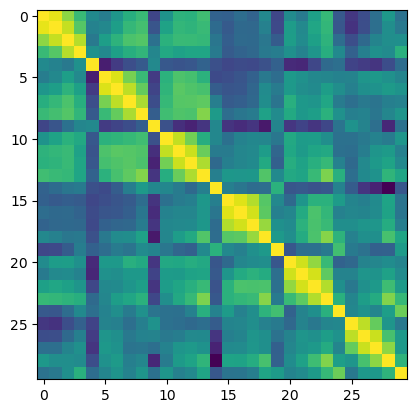

In [252]:
combined_cov = covhigh+covlow
corr_matrix = np.zeros((len(covhigh),len(covhigh)))
for i in range(len(covhigh)):
    for j in range(len(covhigh)):
        corr_matrix[i,j] = (combined_cov[i,j])/(math.sqrt(combined_cov[i,i]*combined_cov[j,j]))
        
plt.imshow(corr_matrix)

67.28893012594445
67.28893012594447


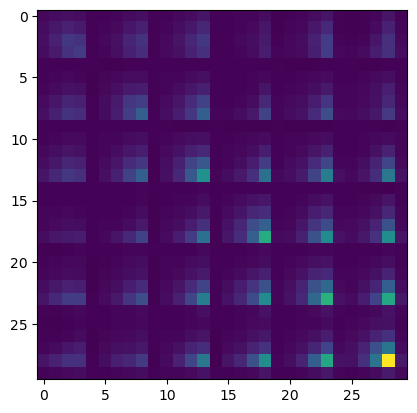

In [254]:

difference = n1highmod.flatten()-n1lowmod.flatten()
invcov = np.linalg.inv(covhigh+covlow)


count=0
for i in range(len(covhigh)):
    for j in range(len(covhigh)):
        count+=difference[i]*invcov[i,j]*difference[j]
        
print(count)  
print(np.sum(np.dot(difference,np.dot(invcov,difference))))

plt.imshow(covhigh+covlow)


[ 1.          2.51486686  6.32455532 15.90541458 40.        ]


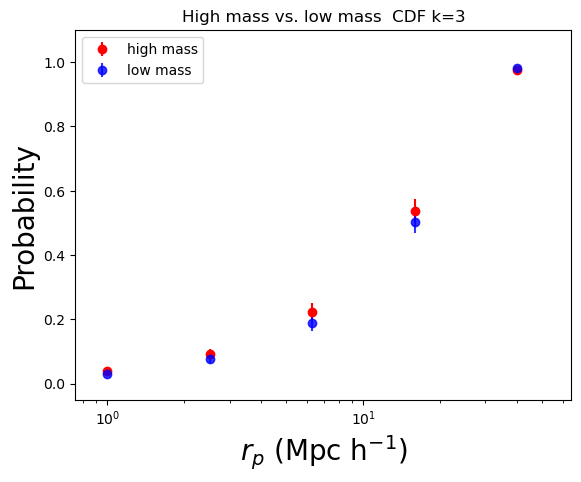

In [230]:
# Concatenated kNN stuff
neighbor = 3
ind = neighbor - 1

# chi_value = kNN_chi_squared(n1highmod[ind],n1lowmod[ind],newcovhigh[ind][ind],newcovlow[ind][ind],single_neighbor=True)

# chi_str = 'chi_square: '+ str(int(chi_value)) + ' over '+ str(len(rsmod))+' degrees of freedom'

# differrnew = kNN_diff_error(n1highmod[ind],n1lowmod[ind],errhigh[ind][0:-1],errlow[ind][0:-1],single_neighbor=True)

nonzero=np.array([n1lowmod != 0])[0]
nonzero=nonzero[ind]

# fig1 = plt.figure(1)
# frame1=fig1.add_axes((.1,.3,.8,.6),xscale='log',yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsmod,n1highmod[ind],yerr=errhigh[ind][0:-1],fmt='o',label='high mass',color='red')
plt.errorbar(rsmod,n1lowmod[ind],yerr=errlow[ind][0:-1],fmt='o',label='low mass',color='blue',alpha=0.8)
plt.ylabel('Probability',fontsize=20)
# plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('High mass vs. low mass  CDF k=' + str(neighbor))
# plt.text(30, 0.25, chi_str, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.axis([0.75,65,-.05,1.1])

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=20)
# plt.figtext(0.5, -.08, chi_str, ha="center", fontsize=12)
plt.legend()

#Residual plot
# frame2=fig1.add_axes((.1,.1,.8,.2),xscale='log',yticks=[-1,0,1])
# plt.scatter(rsmod[nonzero],(n1highmod[ind][nonzero]-n1lowmod[ind][nonzero])/differr[ind][0:-1][nonzero],label='high-low',alpha=0.8)
# plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
# plt.ylabel('(high-low)/error',fontsize=8)
# plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
# plt.axis([0.75,65,-2,2])

print(rsmod)

NameError: name 'chi_str' is not defined

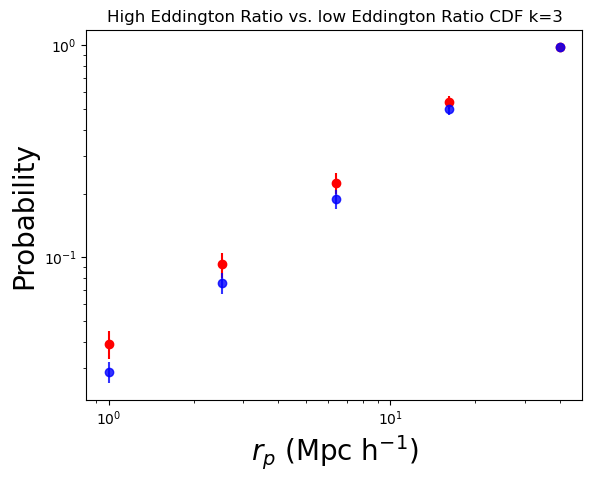

In [46]:
neighbor = 3
ind = neighbor - 1


# chi_str = 'chi_square: '+ str(int(chi_squared[ind])) + ' over '+ str(len(rsmod))+' degrees of freedom'


rsmod=rs[0:-1]
n1highmod
nonzero=np.array([n1lowmod != 0])[0]
nonzero=nonzero[ind]

# fig1 = plt.figure(1)
# frame1=fig1.add_axes((.1,.3,.8,.6),xscale='log',yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsmod,n1highmod[ind],yerr=errhigh[ind][0:-1],fmt='o',label='high Eddington Ratio',color='red')
plt.errorbar(rsmod,n1lowmod[ind],yerr=errlow[ind][0:-1],fmt='o',label='low Eddington Ratio',color='blue',alpha=0.8)
plt.ylabel('Probability',fontsize=20)
# plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('High Eddington Ratio vs. low Eddington Ratio CDF k=' + str(neighbor))
# plt.text(30, 0.25, chi_str, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.axis([0.75,65,-.05,1.1])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=20)
plt.figtext(0.5, -.08, chi_str, ha="center", fontsize=12)
plt.legend()

#Residual plot
# frame2=fig1.add_axes((.1,.1,.8,.2),xscale='log',yticks=[-1,0,1])
# plt.scatter(rsmod[nonzero],(n1highmod[ind][nonzero]-n1lowmod[ind][nonzero])/differr[ind][0:-1][nonzero],label='high-low',alpha=0.8)
# plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
# plt.ylabel('(high-low)/error',fontsize=8)
# plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
# plt.axis([0.75,65,-2,2])




In [1805]:
neighbor = 3

ind = neighbor - 1


rsnew,pisnew,highnew,lownew,errhighnew, errlownew, cov_highnew,cov_lownew = \
chop_cdf(rsmod,pismod,n1highmod,n1lowmod,errhigh[ind][0:-1],errlow[ind][0:-1],a,b,ind)


chi_squarednew = kNN_chi_squared(highnew,lownew,cov_highnew,cov_lownew,single_neighbor=True)

differrnew = kNN_diff_error(highnew,lownew,errhighnew,errlownew,single_neighbor=True)

chi_strnew = 'chi_squared: '+ str(chi_squarednew) + ' / '+ str(len(rsnew))



fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6),xscale='log',yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsnew,lownew,yerr=errlownew,fmt='o',label='low luminosity',alpha=0.8)
plt.errorbar(rsnew,highnew,yerr=errhighnew,fmt='o',label='high luminosity',alpha=0.8)
plt.ylabel('Probability',fontsize=12)
plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('CDF of Rp: High luminosity vs. Low luminosity k=' + str(neighbor))
# plt.text(30, 0.25, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.text(7, 0.15, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.axis([0.75,65,-.05,1.1])

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2),xscale='log',yticks=[-1,0,1])
plt.scatter(rsnew,(highnew-lownew)/differrnew,label='high-low',alpha=0.8)
plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
plt.ylabel('high-low',fontsize=8)
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
plt.axis([0.75,65,-2,2])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4